In [1]:
#################### Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
%matplotlib inline

In [2]:
################### Defining function to get RMSE and r2 values for models
def score(a,b):
    rmse = sqrt(mean_squared_error(a, b))
    r2 = r2_score(a, b)
    return print('The RMSE and r2 value for this model is:',rmse,'&', r2)

In [3]:
df_main = pd.read_csv('Beer Data Set.csv')

In [4]:
df_main.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73


In [5]:
df_main.shape

(185643, 10)

In [6]:
df_main.dtypes

ABV                    float64
Brewing Company          int64
Food Paring             object
Glassware Used          object
Beer Name                int64
Ratings                 object
Style Name              object
Cellar Temperature      object
Serving Temperature     object
Score                  float64
dtype: object

In [7]:
df_main.describe()

,ABV,Brewing Company,Beer Name,Score
count,170513.000000,185643.000000,185643.000000,185643.000000
mean,6.354961,7008.757659,83738.220111,3.198432
std,1.907205,3914.168053,48520.065146,1.358862
min,0.010000,0.000000,0.000000,0.000000
25%,5.000000,3825.000000,41232.500000,3.270000
50%,6.000000,7111.000000,83335.000000,3.710000
75%,7.200000,10402.000000,125148.500000,3.970000
max,80.000000,13541.000000,168534.000000,5.000000


In [8]:
df_main.isnull().sum(axis = 0)

ABV                    15130
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature      6781
Serving Temperature      193
Score                      0
dtype: int64

In [9]:
df_main.dropna(subset=['Serving Temperature'], inplace=True)

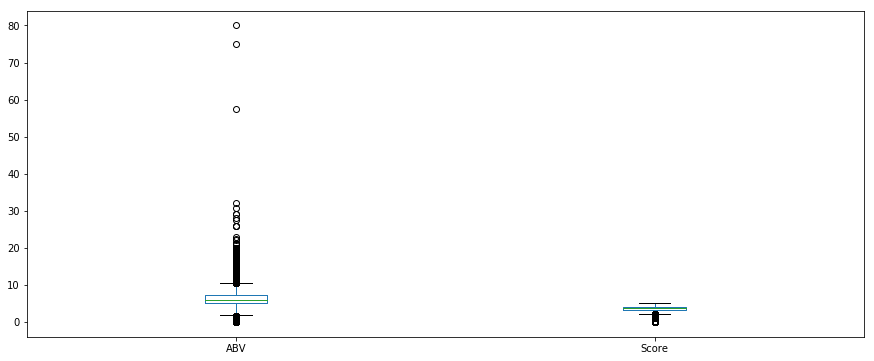

In [10]:
######################## Boxplots for checking outliers
df_main[['ABV', 'Score']].plot(kind='box', figsize = (15,6))

In [11]:
df_main['Serving Temperature'].value_counts()

45-50    113380
40-45     46670
50-55     24089
35-40      1311
Name: Serving Temperature, dtype: int64

In [12]:
df_main['Cellar Temperature'].value_counts()

40-45    95108
35-40    48049
45-50    35705
Name: Cellar Temperature, dtype: int64

In [13]:
############################## Filling Missing Data using Mean
df_main.ABV.fillna((df_main.ABV.mean()), inplace=True)

In [14]:
############################## Filling Missing Data using Mode for Categorical values
df_main['Cellar Temperature'].fillna((df_main['Cellar Temperature'].mode()[0]), inplace=True)
df_main['Serving Temperature'].fillna((df_main['Serving Temperature'].mode()[0]), inplace=True)

## Feature Engineering

In [15]:
df_main['Cellar Temperature'] = df_main['Cellar Temperature'].str.split('-')
df_main['Serving Temperature'] = df_main['Serving Temperature'].str.split('-')

In [16]:
df_main['cellar_low'] = [x[0] for x in df_main['Cellar Temperature']]
df_main['cellar_high'] = [x[1] for x in df_main['Cellar Temperature']]
df_main['serving_low'] = [x[0] for x in df_main['Serving Temperature']]
df_main['serving_high'] = [x[1] for x in df_main['Serving Temperature']]

In [17]:
df_main.cellar_low = df_main.cellar_low.astype('int')
df_main.cellar_high= df_main.cellar_high.astype('int')
df_main.serving_low = df_main.serving_low.astype('int')
df_main.serving_high = df_main.serving_high.astype('int')

In [18]:
df_main.drop(['Cellar Temperature', 'Serving Temperature'], axis=1, inplace=True)

In [19]:
df_main.Ratings = df_main.Ratings.str.replace(',', '')
df_main.Ratings = df_main.Ratings.astype('int')

In [20]:
df_main.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Score,cellar_low,cellar_high,serving_low,serving_high
0,6.500000,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,3.28,40,45,45,50
1,5.500000,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),3.52,35,40,40,45
2,8.100000,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,4.01,35,40,40,45
3,6.357639,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,0.00,35,40,35,40
4,6.000000,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,2.73,35,40,40,45


In [21]:
item = df_main['Food Paring'].value_counts().nsmallest(50).index.tolist()

In [22]:
df_new = df_main[-df_main["Food Paring"].isin(item)]

In [23]:
df_new.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Score,cellar_low,cellar_high,serving_low,serving_high
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,3.28,40,45,45,50
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),3.52,35,40,40,45
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,4.01,35,40,40,45
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,2.73,35,40,40,45
6,3.0,12514,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",43741,15,EnglishBrownAle,3.77,40,45,45,50


In [24]:
df_new = pd.get_dummies(df_new, columns = ['Style Name'], drop_first=True)

In [25]:
df_feat = df_new.drop(['Food Paring', 'Glassware Used', 'Score'], axis=1)

In [26]:
df_new.describe()

,ABV,Brewing Company,Beer Name,Ratings,Score,cellar_low,cellar_high,serving_low,serving_high,Style Name_AmericanBarleywine,...,Style Name_LowAlcoholBeer,Style Name_MrzenOktoberfest,Style Name_PumpkinAle,Style Name_RyeBeer,Style Name_SaisonFarmhouseAle,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_Tripel,Style Name_Witbier
count,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,...,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000,158961.000000
mean,6.315377,7040.234322,84092.696076,31.520040,3.215325,39.655639,44.655639,44.357798,49.357798,0.008317,...,0.002755,0.013928,0.008688,0.009046,0.056504,0.006555,0.008675,0.006354,0.012500,0.020540
std,1.759901,3914.598701,48409.564759,249.934692,1.360349,3.267504,3.267504,2.982203,2.982203,0.090815,...,0.052420,0.117192,0.092802,0.094681,0.230894,0.080698,0.092736,0.079457,0.111102,0.141838
min,0.010000,0.000000,0.000000,0.000000,0.000000,35.000000,40.000000,40.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,4043.000000,41520.000000,1.000000,3.310000,35.000000,40.000000,40.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.100000,7164.000000,83915.000000,2.000000,3.730000,40.000000,45.000000,45.000000,50.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,10428.000000,125421.000000,7.000000,3.980000,40.000000,45.000000,45.000000,50.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,13541.000000,168534.000000,16954.000000,5.000000,45.000000,50.000000,50.000000,55.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualization

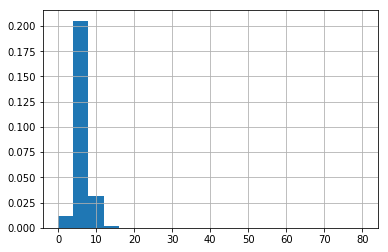

In [27]:
############################# Histogram Distribution of Alcohol Content
df_new.ABV.hist(bins=20,density=True)

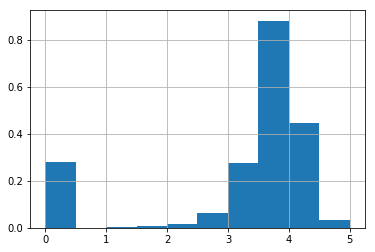

In [28]:
############################# Histogram Distribution of Beer Score
df_new.Score.hist(bins=10,density=True)

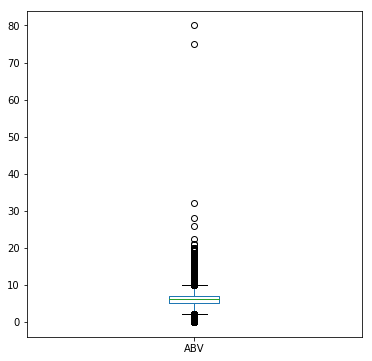

In [29]:
#Boxplots for checking outliers
df_new['ABV'].plot(kind='box', figsize = (6,6))

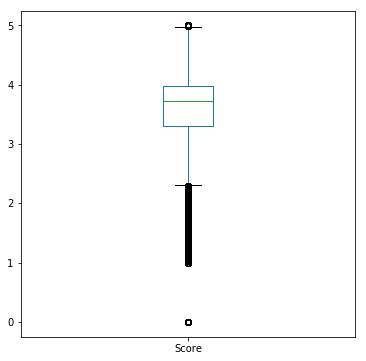

In [30]:
df_new['Score'].plot(kind='box', figsize = (6,6))

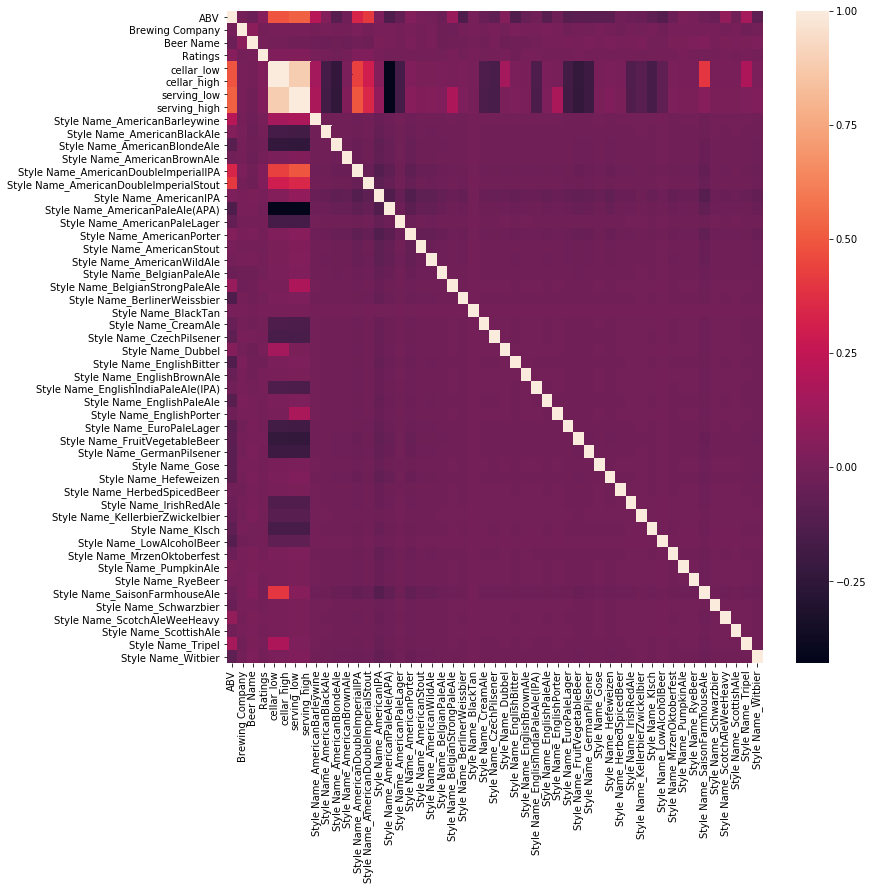

In [31]:
########################## Correlation Heatmap between various Features
a4_dims = (12, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df_feat.corr())

## MODEL BUILDING

In [32]:
X = df_feat.values
y = df_new['Score'].tolist()

In [33]:
############################### Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## LINEAR REGRESSION

In [34]:
reg = LinearRegression(normalize=True, n_jobs = -1)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [35]:
pred = reg.predict(X_test)

In [36]:
score(y_test,pred)

The RMSE and r2 value for this model is: 1.3352310556765072 & 0.0412439201334549


## DECISION TREE REGRESSOR

In [37]:
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X_train, y_train)
pred1 = reg.predict(X_test)

In [38]:
score(y_test, pred1)

The RMSE and r2 value for this model is: 0.36646608362393396 & 0.927779106830538


## RANDOM FOREST REGRESSOR

In [39]:
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
pred2 = clf.predict(X_test)

In [40]:
score(y_test,pred2)

The RMSE and r2 value for this model is: 0.3483279613422784 & 0.9347512858936999


#### Best Model for this data seems to be Random Forest Regressor as it explains maximum Variance of Data.